In [6]:
#Questions from kaggle
import numpy as np
import pandas as pd

In [7]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt

mpl.style.use('seaborn-darkgrid')

In [8]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [9]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [11]:
df.describe(include=['O'])

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [12]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


1) Develop an estimated multiple linear regression equation with **mbap as response variable and sscp & hscp as the two predictor variables**. Interpret the regression coefficients and check whether they are significant based on the summary output 


In [13]:
import seaborn as sns

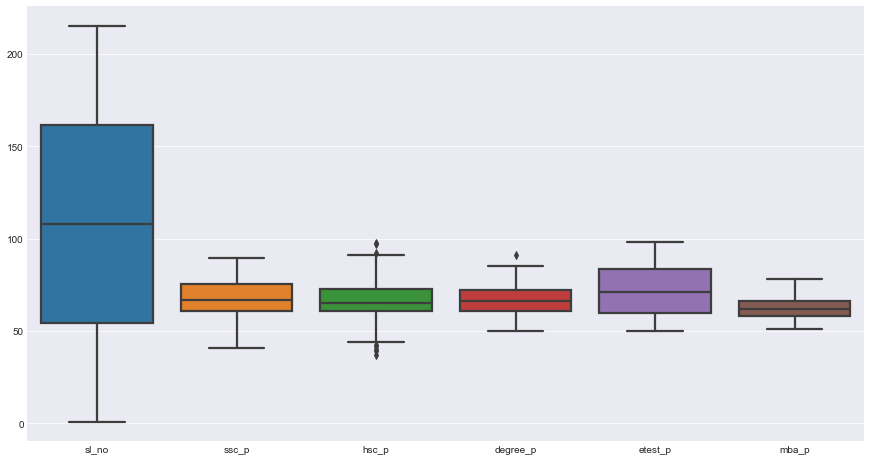

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set_context('talk')
sns.boxplot(data=df.drop(columns='salary'),ax=ax)

hsc_p have some outliears removing the outliers from hsc_p

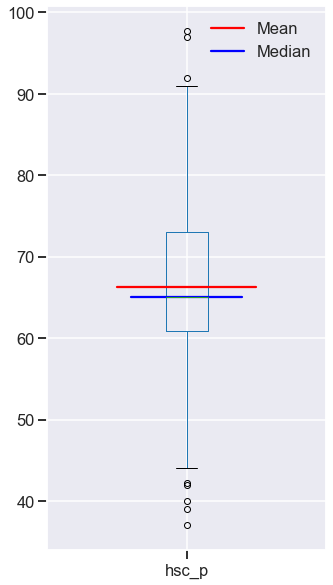

In [15]:
import numpy as np
fig, ax = plt.subplots(figsize=(5,10))
_= df['hsc_p'].plot(kind='box', ax=ax,)
plt.axhline(np.mean(df['hsc_p']), xmin= 0.25, xmax=0.75, label='Mean', color='red')
plt.axhline(np.median(df['hsc_p']), xmin= 0.3, xmax=0.7, label='Median', color='blue')
ax.legend()

### mean is greater than median hence Right skewed data

In [16]:
#removing outliears

#calculating upper whiskers

hsc_p = df['hsc_p'].describe()
UWhiskers = hsc_p['75%'] + 1.5 * (hsc_p['75%'] - hsc_p['25%'])
LWhiskers = hsc_p['25%'] - 1.5 * (hsc_p['75%'] - hsc_p['25%'])
print(f'Upper Whiskers : {UWhiskers}')
print(f'Upper Whiskers : {LWhiskers}')

Upper Whiskers : 91.15
Upper Whiskers : 42.75


In [17]:
df['hsc_p'].loc[df['hsc_p'] > UWhiskers] = UWhiskers
df['hsc_p'].loc[df['hsc_p'] < LWhiskers] = LWhiskers

C:\Users\anil\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


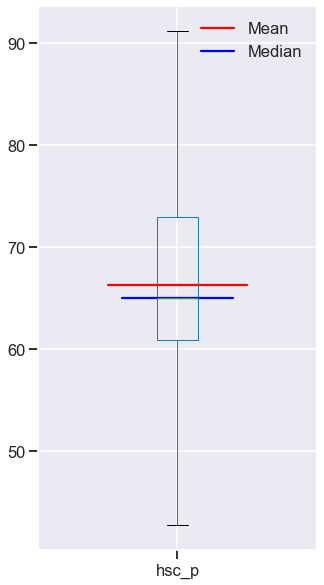

In [18]:
fig, ax = plt.subplots(figsize=(5,10))
_= df['hsc_p'].plot(kind='box', ax=ax,)
plt.axhline(np.mean(df['hsc_p']), xmin= 0.25, xmax=0.75, label='Mean', color='red')
plt.axhline(np.median(df['hsc_p']), xmin= 0.3, xmax=0.7, label='Median', color='blue')
ax.legend()

In [19]:
#Checking distribution of Target variables

df['mba_p'].describe()


count    215.000000
mean      62.278186
std        5.833385
min       51.210000
25%       57.945000
50%       62.000000
75%       66.255000
max       77.890000
Name: mba_p, dtype: float64

In [20]:
#sscp & hscp
X = df[['ssc_p', 'hsc_p']]
y = df[['mba_p']]
print(X.head())
print(y.head())

   ssc_p  hsc_p
0  67.00  91.00
1  79.33  78.33
2  65.00  68.00
3  56.00  52.00
4  85.80  73.60
   mba_p
0  58.80
1  66.28
2  57.80
3  59.43
4  55.50


In [21]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=123)

In [22]:
print(f'shape of train data : {xtrain.shape} : {ytrain.shape}')
print(f'shape of train data : {xtest.shape} : {ytest.shape}')

shape of train data : (172, 2) : (172, 1)
shape of train data : (43, 2) : (43, 1)


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
mlr = LinearRegression()
mlr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
mlr.intercept_, mlr.coef_

(array([45.02802597]), array([[0.15063732, 0.10043695]]))

In [26]:
yhat = mlr.predict(X)

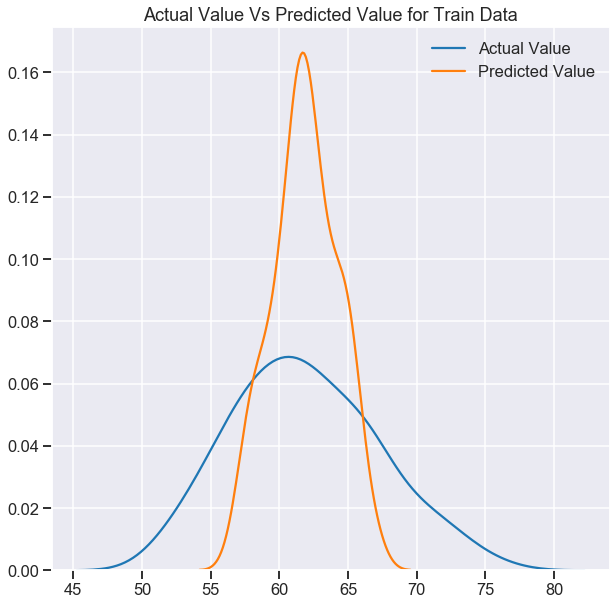

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(ytrain, label='Actual Value', hist=False, ax=ax)
sns.distplot(mlr.predict(xtrain), label='Predicted Value', hist=False, ax=ax)
ax.legend()
_ = ax.set_title('Actual Value Vs Predicted Value for Train Data')

In [28]:
# from Above figure we can see that it didn't do well when features values were ssc_p, hsc_p
print(f'the score = {mlr.score(X, y)* 100}')

the score = 17.456584334243782


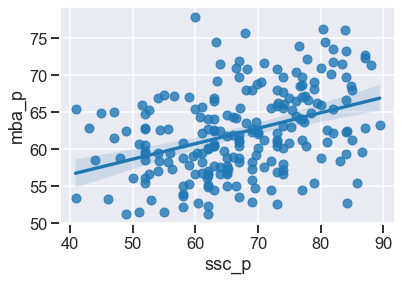

In [29]:
sns.regplot(X.iloc[:, 0], y)

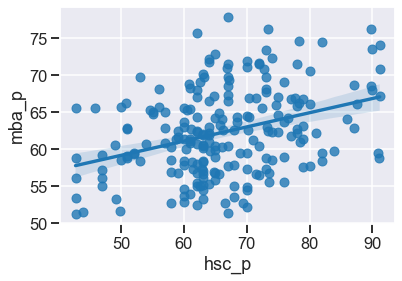

In [30]:
sns.regplot(X.iloc[:, 1], y)

In [31]:
pd.concat([X,y], axis=1).corr()

,ssc_p,hsc_p,mba_p
ssc_p,1.000000,0.513478,0.388478
hsc_p,0.513478,1.000000,0.348452
mba_p,0.388478,0.348452,1.000000


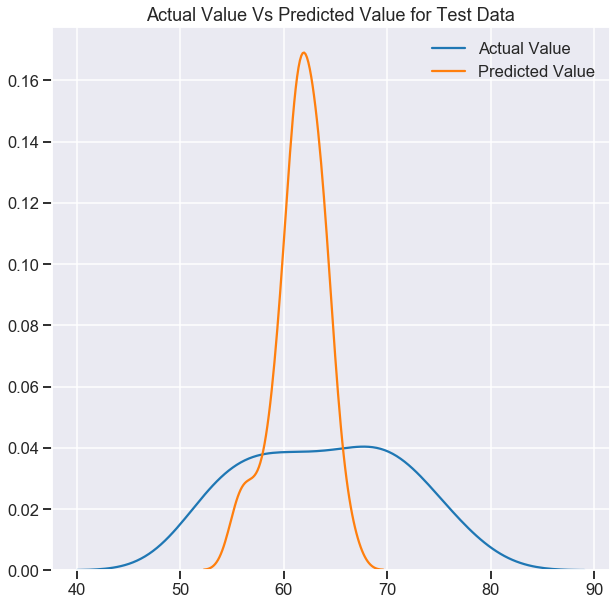

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(ytest, label='Actual Value', hist=False, ax=ax)
sns.distplot(mlr.predict(xtest), label='Predicted Value', hist=False, ax=ax)
ax.legend()
_ = ax.set_title('Actual Value Vs Predicted Value for Test Data')

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
print(f'the mean square error train data is {mean_squared_error(ytrain, mlr.predict(xtrain))}')
print(f'the mean square error test data is {mean_squared_error(ytest, mlr.predict(xtest))}')

the mean square error train data is 22.490721693355397
the mean square error test data is 49.82481750728871



2) Estimate a multiple regression equation for each of the below scenarios and based on the model’s R-square comment which model is better. 
    (i) Use **mbap as outcome variable and sscp & degreep as the two predictor variables**.  
    (ii) Use **mbap as outcome variable and hscp & degreep as the two predictor variables**. 

In [35]:
mlr2 = LinearRegression()
x = df[['ssc_p', 'degree_p']]
y = df[['mba_p']]
xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size=0.2, random_state=0)
mlr2.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Actual vs predicted Test Data')

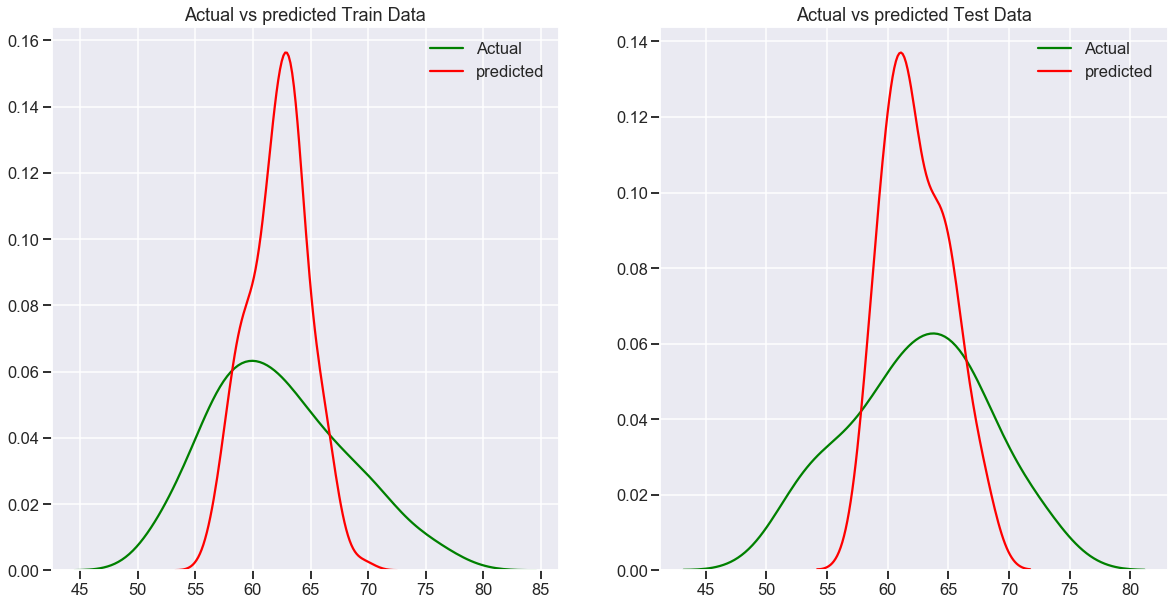

In [36]:
fig,ax=plt.subplots(1,2, figsize=(20,10))


sns.distplot(ytrain, hist=False, color='green', label='Actual', ax=ax[0])
sns.distplot(mlr2.predict(xtrain), hist=False, color='red', label='predicted', ax=ax[0])
ax[0].legend()
ax[0].set_title('Actual vs predicted Train Data')


sns.distplot(ytest, hist=False, color='green', label='Actual', ax=ax[1])
sns.distplot(mlr2.predict(xtest), hist=False, color='red', label='predicted', ax=ax[1])
ax[1].legend()
ax[1].set_title('Actual vs predicted Test Data')

In [37]:
print('The Score of model (test Data )= ' ,mlr2.score(xtest,ytest) *100)
print('The Score of model (Train Data )= ' ,mlr2.score(xtrain,ytrain) *100)

print(f'The Regression Line is given by : \n y = {round(mlr2.coef_[0,0], 4)} * {x.columns.values[0]} + {round(mlr2.coef_[0,1], 4)} * {x.columns.values[1]}  + {mlr2.intercept_[0]} ' )

The Score of model (test Data )=  26.70526417462228
The Score of model (Train Data )=  18.891435715121137
The Regression Line is given by : 
 y = 0.1238 * ssc_p + 0.2152 * degree_p  + 39.65800694852322 


In [38]:
pd.concat([x,y], axis='columns').corr()

,ssc_p,degree_p,mba_p
ssc_p,1.000000,0.538404,0.388478
degree_p,0.538404,1.000000,0.402364
mba_p,0.388478,0.402364,1.000000


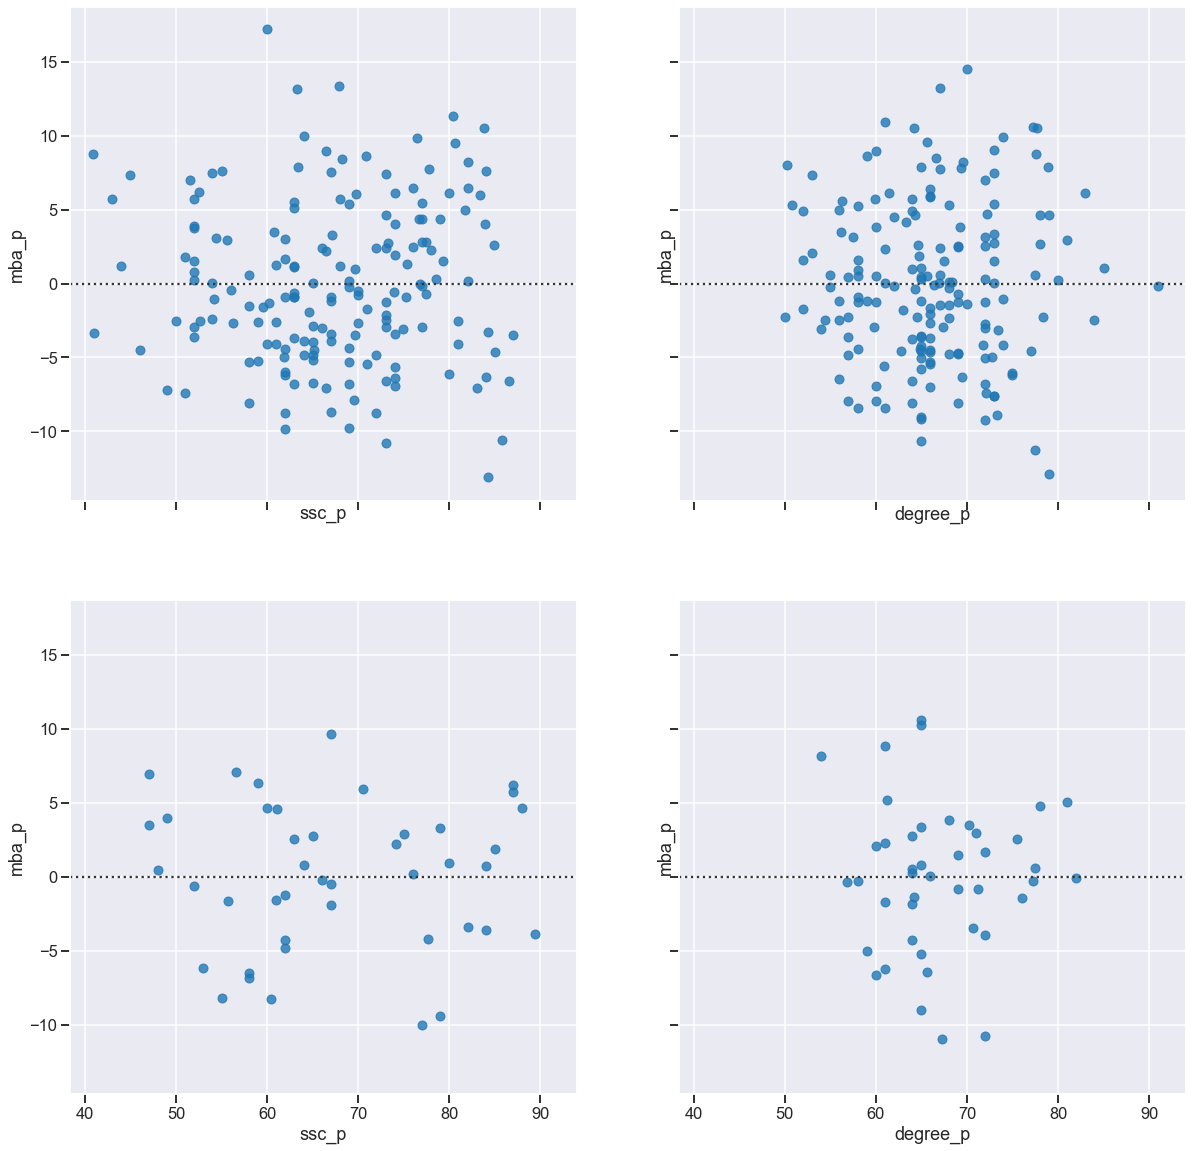

In [39]:
fig, ax = plt.subplots(2,2, figsize=(20,20), sharey=True, sharex=True)

sns.residplot(xtrain.iloc[:,0], ytrain, ax=ax[0,0])
sns.residplot(xtrain.iloc[:,1], ytrain, ax=ax[0,1])

sns.residplot(xtest.iloc[:,0], ytest, ax=ax[1,0])
sns.residplot(xtest.iloc[:,1], ytest, ax=ax[1,1])
